# <span style="color:#2595bc"> Finite Markov Decision Processes</span>

In this notebook, we will try to define the field of reinforcement learning. We would also look into the mathematical structures of a reinforcement problem such <span style="color:#f31818">value functions</span> and <span style="color:#f31818">Bellman equations</span>. We would also code the solution to a specific <span style="color:#f31818">GridWorld</span> problem. 

This notebook involves a fair bit of conditional probability. You can read about conditional probability <a href="http://setosa.io/conditional/">here</a>.<p>You also should be able to find out the <a href="https://revisionmaths.com/advanced-level-maths-revision/statistics/expectation-and-variance">expectation </a>of a probability distribution</p>


<a id="1"></a>
## <span style="color:#2595bc"> The Agent-Environment Interface </span>

Let's define some terms and then we will see an example to get a good understanding of the terms.

### <span style="color:#2595bc"> Definitions </span>

The learner and decision-maker is called the <span style="color:#f31818"><b><i>agent</i></b></span>. The thing our agent interacts with, comprising everything outside ,which <strong>cannot be manipulated by agent</strong>, is called the <span style="color:#f31818"><b><i>environment</i></b></span>. 

These interact continually, the agent selecting actions and the environment responding to those actions and presenting new situations to the agent. The environment is often defined by it's <i>'state'</i> .The environment also gives rise to <span style="color:#f31818"><b><i>rewards</i></b></span>, special numerical
values that the agent tries to maximize over time. A complete specification of an
environment, including how rewards are determined, defines a task , which is one instance of
the reinforcement learning problem
<span 

<img src="images/agent_env.png"></img>

More specifically, the agent and environment interact at each of a sequence of
discrete time steps, $t = 0, 1, 2, 3, . . .. $ . At each time step $t$, the agent receives some
representation of the environment’s <i>state</i>, $S_t \in \mathbb S $, where $\mathbb S$ is the set of possible states that the environment can have, and on that basis the agent selects an action, $A_t \in \mathbb A (S_t)$, where $\mathbb A(S_t )$ is the set of actions available in state $S_t$ . One time step later, in part as a consequence of its action, the agent receives a numerical reward , $R_{t+1} \in \mathscr{R}$ , where $\mathscr{R}$ is the set of possible rewards the agent might get, and finds itself in a new state,
$S_{t+1}$ . 


### <span style="color:#2595bc"> Example </span>
One example of it can be a robot which collects garbage. Let's assume the robot has a limited battery life. It could move around and search actively for garbage, which consumes battery. It could also wait for people to come to it and deposit garbage, which doesn't consume battery. The reward for the robot would be higher when it actively searches than when people come to it. When it is low in battery it needs to head over to the base to recharge. If it tries to actively search for garbage while having low battery, it would be needed to be sent to recharge center which has a high negative reward associated with it.



The agent therefore
has three actions which make up our $\mathbb A $. The set $\mathbb A$ would be $\{Search, Wait, Recharge\}$, and its state is determined by the state of the battery. So  set $\mathbb S$ would be $\{High, Low\}$.The rewards
might be zero most of the time, but then become positive when the robot secures
an empty can, or large and negative if the battery runs all the way down. 

In this example,it is <span style="color:#f31818">important</span> to note that the reinforcement learning agent is <span style="color:#f31818"><b><i>not</i></b></span> the entire robot. The states it
monitors describe conditions within the robot itself,which is the battery level, not conditions of the robot’s
external environment. The agent’s environment therefore includes the rest of the
robot, which might contain other complex decision-making systems, as well as the
robot’s external environment.


<a id="2"></a>
## <span style="color:#2595bc"> Policy </span>

This refers to how the agent selects an action $a$ at a given state $S_t$. At each time step, the agent implements a mapping from states to <b>probabilities</b>
of selecting each possible action. This mapping is called the agent’s policy and is
denoted $\pi_t$, where $\pi_t (a\mid s)$ is the probability that $A_t = a$ if $S_t = s$

Reinforcement
learning methods specify how the agent changes its policy as a result of its experience.
The agent’s goal, roughly speaking, is to maximize the total amount of reward it
receives over the long run.

<a id="3"></a>
## <span style="color:#2595bc"> Goals and Rewards </span>

In reinforcement learning, the Purpose or Goal of the agent is formalized in terms of a
special reward signal passing from the environment to the agent. At each time step,
the reward is a simple number, $R_t$. Informally, the agent’s Goal is to maximize the
total amount of reward it receives. This means maximizing <i><b>not</b> immediate reward,
but cumulative reward in the long run. </i>

Setting the way in which our agent gets rewards is important as it would define what characteristics our agent would learn. For eg, to make a robot learn to walk, we can provide reward on each time step
proportional to the robot’s forward motion. In making a robot learn how to escape
from a maze, the reward is often −1 for every time step that passes prior to escape;
this encourages the agent to escape as quickly as possible.

<a id="4"></a>
## <span style="color:#2595bc"> Returns </span>
We need to formally define the Goal. We introduce the concept of Returns which our agent's objective would be to maximize. 

Let the sequence of rewards received after time-step $t$ be $R_{t+1}, R_{t+2}, R_{t+3} . . . $

In simplest case our return can be defined as the sum of rewards:
$$ G_t = R_{t+1} + R_{t+2} + R_{t+3}+ . . + R_{T}$$

where $T$ is the final time step.This approach makes sense in applications in which there
is a natural notion of final time step, that is, when the agent–environment interaction
breaks naturally into subsequences, which we call <i>episodes</i>, such as plays of a game,
trips through a maze, or any sort of repeated interactions. Each episode ends in a
special state called the terminal state, followed by a reset. Tasks with episodes of this kind are called <i>episodic tasks</i>.

When the interaction does not
break naturally into identifiable episodes, but goes on continually without limit, we call them <i>continuing tasks</i>. We cannot use the above formulation as $T$ = $\infty$. So we introduce the concept of <span style="color:#f31818"><b><i>discounting</i></b></span>. Agent now tries to select actions so that the sum of the <i>discounted rewards</i>
it receives over the future is maximized. In particular, it chooses $A_t$ to maximize the
expected <i>discounted return</i>:

$$ G_t =  R_{t+1} + \gamma R_{t+2} +\gamma^2 R_{t+3}+ . . . = \sum_{k=0}^{\infty}R_{t+k+1}$$
where $\gamma$ is a parameter, $0\leq\gamma\leq1$, called the <span style="color:#f31818"><b>discount rate</b></span>

The discount rate determines the present value of future rewards: a reward received
$k$ time steps in the future is worth only $\gamma^{k-1}$ times what it would be worth if it were
received immediately. It could be justified that because of the uncertainty associated with future time steps there is a decay in the future expected rewards. The more closer we are to the time step, the more accurately we can predict/expect the reward if we take a particular action. If $\gamma = 0$, the agent is "myopic" that is concerned only with the immediate rewards. It's objective is to only lean how to choose $A_t$ so as to maximize only $R_{t+1}$

We also can use the newly obtained formula for episodic tasks as well, if take $\gamma = 1$ and $R_t = 0 $ for $t > T$

<a id="5"></a>
## <span style="color:#2595bc"> Markov Property </span>
To clarify a few things before we proceed further, by the "state" of the environment we mean whatever information is available to the agent through signals about the environment.

Now, consider how a general environment might respond at time $t + 1$ to the action taken
at time $t$. In the most general, causal case, this response may depend on every-
thing that has happened earlier. In this case the dynamics can be defined only by
specifying the complete joint probability distribution which would involve all the actions and states that were present previous to $t$ :
$$ P_r \Bigl\{S_{t+1} = s^{'},R_{t+1}=r \mid S_0, A_0, R_0. . . .S_{t-1},A_{t-1},R_t,S_t,A_t\Bigr\} $$
 


If the state signal has the Markov property, on the other hand, then the
<span style="color:#f31818">environment’s response at $t + 1$ depends only on the state and action representations
at $t$</span>, in which case the environment’s dynamics can be defined by specifying only:

$$p(s^{'},r \mid s,a) = P_r \Bigl\{S_{t+1}=s^{'},R_{t+1}=r \mid S_t = s, A_t = a\Bigr\} $$

<b>To put in simpler terms, in Markov process, if we know the current state, then we can predict the future state for an action taken, without needing the knowledge of previous passed states.</b> 

The Markov property is important in reinforcement learning because decisions and
values are assumed to be a function only of the current state.

One can also show that, by iterating this equation, one can predict all future
states and expected rewards from knowledge only of the current state as well as
would be possible given the complete history up to the current time.

<a id="6"></a>
## <span style="color:#2595bc"> Markov Decision Processes</span>

A reinforcement learning task that satisfies the Markov property is called a <i>Markov
decision process</i>, or MDP. If the state and action spaces are finite, then it is called a
<i>finite Markov decision process</i> (<i>finite</i> MDP)

Next comes the defining expression/property of MDPs which we obtain from the nature of Markov Processes. The below expression completely specify the dynamics of a finite MDP. Given any state and action $s$ and $a$, the probability
of each possible pair of next state and reward, $s$ , $r$, is denoted

## <span style="color:#f31818">$$p(s',r \mid s,a) = P_r \Bigl\{S_{t+1}=s',R_{t+1}=r \mid S_t = s, A_t = a\Bigr\} $$<span style="color:#f31818">

Given the dynamics as specified by the above equation, one can compute anything else one might
want to know about the environment, such as the expected rewards for state–action
pairs( shows the expectation of reward,$R_{t+1}$, if we take action $a$ at state $s$ at time step $t$ ) - 

### $$r(s,a) = \mathbb E\Bigl[R_{t+1} \mid S_{t}=s, A_{t}=a \Bigr] = \sum_{r \in \mathscr{R}}r\sum_{s' \in \mathbb S} p(s',r \mid s,a)$$ 
(are you able to reason why the double summation comes ?) <br>
(Hint : What's the formulea for finding Expectation?)

We can also find the <i> state-transition probabilities,</i> -
### $$p(s'\mid s,a ) = Pr\Bigl\{S_{t+1} = s' \mid S_{t} = s, A_{t} = a\Bigr\} = \sum_{r \in \mathscr{R}}p(s',r \mid s,a)$$ 

and the expected rewards for (state)-(action)-(next-state) triples, 

### $$r(s,a, s') = \mathbb E\Bigl[R_{t+1} \mid S_{t}=s, A_{t}=a \Bigr] = \sum_{r \in \mathscr{R}}r\sum_{s' \in \mathbb S} p(s',r \mid s,a)$$ 

<a id="6example"></a>
### <span style="color:#2595bc"> Example - MDP for the robot problem</span>
Recall the example of the trash collecting robot we had seen earlier. Let's add some more information and convert it into an MDP.

Recall that the agent makes a decision at times determined by external events (or by other parts of the robot’s control system). At each such time the robot decides whether it should <ol><li>Actively search for trash</li> <li>Remain stationary and wait for
someone to bring it trash</li> <li>Go back to home base to recharge its battery.</li></ol>
Suppose the environment works as follows. The best way to find trash is to actively search for them, but this runs down the robot’s battery, whereas waiting does not. Whenever the robot is searching, the possibility exists that its battery will become depleted. In this case the robot must shut down and wait to be rescued (producing a low reward).

The agent makes its decisions solely as a function of the energy level of the battery.
It can distinguish two levels, high and low, so that the state set is
$\mathbb S = \biggl\{high, low\biggr\}$

Let us call the possible decisions—the agent’s actions—<b>wait</b>, <b>search</b>, and <b>recharge</b>.
When the energy level is high, recharging would always be foolish, so we do not
include it in the action set for this state. The agent’s action sets are:- 
$$\mathbb A(high) = \Bigl\{search, wait\Bigr\}$$
$$\mathbb A(low) = \Bigl\{search, wait, recharge\Bigr\}$$

If the energy level is <b>high</b>, then a period of active search can always be completed
without risk of depleting the battery.

A period of searching that begins with a <b>high</b>
energy level leaves the energy level high with probability $\alpha$ and reduces it to <b>low</b>
with probability 1 − $\alpha$. 

On the other hand, a period of searching undertaken when
the energy level is low leaves it low with probability $\beta$ and depletes the battery with
probability 1 − $\beta$. In the latter case, the robot must be rescued, and the battery
is then recharged back to high. 

Each trash collected by the robot counts as a unit
reward, whereas a reward of −3 results whenever the robot has to be rescued. 

Let
${r}_{search}$ and ${r}_{wait}$ , with ${r}_{search}$ > ${r}_{wait}$ , respectively denote the expected number of
trash the robot will collect (and hence the expected reward) while searching and while
waiting. 

Finally, to keep things simple, suppose that no cans can be collected during
a run home for recharging, and that no cans can be collected on a step in which the
battery is depleted.

This system is then a finite MDP, and we can write down the
transition probabilities and the expected rewards, as in Table below, 
<a id="6a"></a>

<img src="images/table.png"></img>

A <i>transition graph</i> is a useful way to summarize the dynamics of a finite MDP.Below is the transition graph for the recycling robot example
<a id="6b"></a>
<img src="images/graph.png"></img>


Observe that there are two kind of nodes, <i>state nodes</i> and <i>action nodes</i>. There is a state node for each possible state( a large open circle denoted by the state name), and an action node for each state-action-state triplet (solid circle labeled by name of the action and connected by a line to the state node). 

<a id="7"></a>
## <span style="color:#2595bc"> Value Functions </span>

Almost all reinforcment learning algoritms involve estimating <i>value functions</i> - functions of states ( or of state-action pairs ) that <b>estimate <i>how good</i> </b>it is for the agent to be in a given state(or to perform a action under given state). We have seen examples of value functions in the form of action-values in the previous notebook(for K-Bandit).

The notion of "how good" is defined in terms of expected future rewards, or to be precise, expected return. As obvious, the rewards the agent can expect in future depend on what actions it will take. So, value functions are defined with respect to particular policies (policy explained in a previous <a href="#2">section</a>)

Recall that a policy $\pi$ is a map from each state, $s \in \mathbb S$, and action, $a \in \mathbb A(s)$ to the probability $\pi(a\mid s)$ of taking $s$ when in state $s$.

<img src="images/state_and_action.png"></img>

<a id="8"></a>
<img src="images/bellman_eqn.png"></img>



Following is the derivation of the above expressions


<img src="images/Bellman.png"></img>

### <span style="color:#2595bc">Various other forms of equation </span>

Using the relations where values of state were expressed as an expression of the possible succeeding state and immediate expected rewards,we can derive other forms of equations which might be interest.

###### <span style="color:#2595bc"> $V_{\pi} \text{ in terms of } q_{\pi}\text{ and vice versa}$ </span>

$$ v_{\pi} = \sum_{a \in \mathbb A} \pi (a \mid s)q_{\pi}(s,a)$$
$$ q_{\pi} = R_{s}^{a} + \gamma \sum_{s' \in \mathbb S} P_{ss'}^{s}v_{\pi}(s')$$

where $R_{s}^{a}$ is the expected return after taking action $a$ from state $S$ and $P_{ss'}^{a}$ is the probability that the environment is in state $a'$ after the agent takes action $s$ from state $s$

###### <span style="color:#2595bc">Expectation Equations</span>

<img src="images/v_sum.png"></img>
For $q_{\pi}$
<img src="images/q_sum.png"></img>



<a id="9"></a>
## <span style="color:#2595bc"> Grid World </span>

Figure shows a rectangular gridworld representation of a simple finite MDP. The cells of the grid correspond to the states of the environment. At each cell, four actions are possible: $north, south, east, and
west$, which deterministically cause the agent to move one cell in the respective direction on the grid. 

Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of −1. Other actions result in a reward of 0, except those that move the agent out of the special states A and B. From state A,all four actions yield a reward of +10 and take the agent to A' . From state B, all actions yield a reward of +5 and take the agent to B'. Think A as a portal .When the agent reaches A,it gets a reward of +10 and gets transported to state A'. Similar for B and B' with a reward 5.

<img src="images/gridworld.png"></img>

<a id="9a"></a>
### <span style="color:#2595bc">Finding Policy values</span>

Let's find out the policy values of each state/grid. Although there are many ways of achieveing this, right now we will find the values through Dynamic Programming method called Iterative Policy Evaluation. (More on this in the next notebook. Let's just implement as we go by and understand in the next one)

We know that - 

$$v_{k+1} = \sum_{a \in \mathbb{A}} \pi(a \mid s)\Biggl(R_{s}^{a} + \gamma\sum_{s' \in \mathbb{S}}P_{ss'}^{a}v_{k}(s')\Biggr) $$

The algorithm would be -

&nbsp;&nbsp;&nbsp;&nbsp; Set $V(s)$ randomly (say all states to 0)<br>

&nbsp;&nbsp;&nbsp;&nbsp; loop untill policy good enough<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;loop for $s \in \mathbb S$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;loop for $a \in \mathbb A$<br>
	
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q(s,a) = \sum_{a \in \mathbb{A}} \pi(a \mid s)\Biggl(R_{s}^{a} + \gamma\sum_{s' \in \mathbb{S}}P_{ss'}^{a}v_{k}(s')\Biggr) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(s):=Q(s,a)$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;end loop<br>

&nbsp;&nbsp;&nbsp;&nbsp;end loop<br>


<a id="9b"></a>

In [1]:
import numpy as np
import os
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0,parentdir) 

from utils import plotting

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:


A = [0,1]
A_prime= [4,1]

B = [0,3]
B_prime = [2,3]

def get_state_values(portal_initials=[A,B],
               portal_destinations=[A_prime,B_prime],
               portal_rewards=[10,5],
               discount=0.9,
               grid_size=5,
               action_probabilities=[.25,.25,.25,.25]):
    '''
    grid_size --> Size of the grid world
    portal_initials --> list of Coordinates of points/state from where the agent 
                        jumps to other states. Eg in our example, it will be [A,B]
    portal_initials --> list of Coordinates of points/state to where the agent 
                        jumps to other states. Eg in our example, it will be [A_prime,B_prime]
    portal_rewards ---> list of rewards when the jump occurs 
                                               Eg in our example, it will be [10,5]
    discount ---------> parameter
    probablities------> probabilities of picking ['L','R','U','D'] at each state
    '''
    gridWorld = np.zeros([grid_size,grid_size])
    actions = ['L','R','U','D']
    actprobs = {'L': action_probabilities[0],
                'R': action_probabilities[1],
                'U': action_probabilities[2],
                'D': action_probabilities[3]}
    
    #Store next states for each action at all values of states
    next_states = []
    #Store rewards for each action at all values of states
    action_rewards = []
    
    
    for i in range(grid_size):
        
        next_states.append([])
        action_rewards.append([]) 
        
        for j in range(grid_size):
            next_state = dict()
            action_reward = dict()
            
            if i==0:
                next_state['U'] = [i,j]
                action_reward['U'] = -1.
            else:
                next_state['U'] = [i-1,j]
                action_reward['U'] = 0.            
            
            if i==grid_size-1:
                next_state['D'] = [i,j]
                action_reward['D'] = -1.
            else:
                next_state['D'] = [i+1,j]
                action_reward['D'] = 0.            
                        
            if j==0:
                next_state['L'] = [i,j]
                action_reward['L'] = -1.
            else:
                next_state['L'] = [i,j-1]
                action_reward['L'] = 0. 
                                            
            if j==grid_size-1:
                next_state['R'] = [i,j]
                action_reward['R'] = -1.
            else:
                next_state['R'] = [i,j+1]
                action_reward['R'] = 0. 
            
            if [i,j] in portal_initials:
                next_state['L']=next_state['R']=next_state['U']=next_state['D']=portal_destinations[portal_initials.index([i,j])]
                action_reward['L']=action_reward['R']=action_reward['U']=action_reward['D']=portal_rewards[portal_initials.index([i,j])]
            
            next_states[i].append(next_state)
            action_rewards[i].append(action_reward)

    #Initiate V_s to zeros
    V_s = np.zeros([grid_size,grid_size])
    counter = 0
    while(True):
        Q_s = np.zeros_like(V_s)
        for i in range(grid_size):
            
            for j in range(grid_size):
                
                for action in actions:
                 
                  
                    #Find Q_(s,a) for given current V(s,a) from Bellman
                    new_position = next_states[i][j][action]
                    Q_s[i][j] += actprobs[action]*(action_rewards[i][j][action]+
                                                 discount*V_s[new_position[0],new_position[1]])
                   
          
         
        if np.sum(np.abs(V_s - Q_s)) < 1e-6:
           
            V_s = Q_s
            break
        #Update
        V_s = Q_s
        counter +=1
    
        
            
    
    
    
    return V_s
    
    
    
    
  

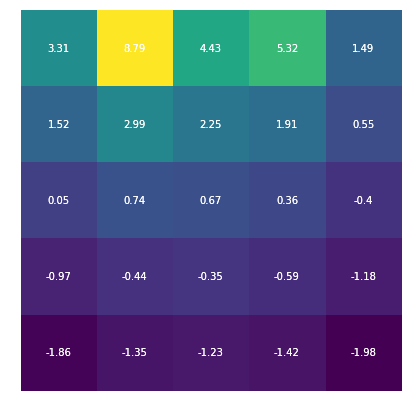

In [3]:

    
plotting.plot_gridworld_values(get_state_values())



<a id="10"></a>
## <span style="color:#2595bc"> Optimal Value Functions </span>

Solving a reinforcement learning task means, roughly, finding a policy that achieves a
lot of reward over the long run.

Value functions define a partial ordering over policies. A policy $\pi$ is defined to be better than or equal to a policy $\pi'$ if its expected return
is greater than or equal to that of $\pi'$ for all states. In other words, $\pi$ ≥ $\pi'$ if and only
if  $v_{\pi}(s)$ ≥ $v_{\pi'}(s)$ for all $s\in \mathbb S$.

There is always at least one policy that is better than or equal to all other policies. This is an optimal policy. Although there may be more than one, we denote all the optimal policies by $\pi_{*}$ .They share the same state-value function, called the optimal state-value function, denoted $v_{*}$ , and defined as

### $$ v_{*}(s) = max_{\pi}v_{\pi}(s)$$ 
$\text{for all s} \in \mathbb S$

Optimal policies also share the same <i>optimal action-value function</i>, denoted $q_{*}$ ,
and defined as

### $$ q_{*}(s,a) = max_{\pi}q_{\pi}(s,a)$$ 
$\text{for all s} \in \mathbb S \text{ and for all a} \in \mathbb A(s)$

For the state–action pair $(s, a)$, this function gives the
expected return for taking action $a$ in state $s$ and thereafter following an optimal
policy. Thus, we can write $q_{∗}$ in terms of $v_{∗}$ as follows:

### $$q_{*}(s,a) = \mathbb E\Bigl[R_{t+1} + \gamma v_{*}(S_{t+1} \mid S_{t}=s,A_{t}=a\Bigr]$$

As, the optimal functions also we follow Bellman's equation, 

<img src="images/optimal.png"></img>


<a id="10a"></a>
Therefore, to get the optimal policy, instead of taking the expectation, as we were taking, earlier, we would have to take the branch with maximum value. 

The iterative algorithm for this would be of the form - 


&nbsp;&nbsp;&nbsp;&nbsp; Set $V(s)$ randomly (say all states to 0)<br>

&nbsp;&nbsp;&nbsp;&nbsp; loop untill policy good enough<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;loop for $s \in \mathbb S$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;loop for $a \in \mathbb A$<br>
	
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Q(s,a) =max_{a}\Biggl(R_{s}^{a} + \gamma\sum_{s' \in \mathbb{S}}P_{ss'}^{a}v_{k}(s')\Biggr) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$V(s):=Q(s,a)$<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;end loop<br>

&nbsp;&nbsp;&nbsp;&nbsp;end loop<br>


In [4]:
def get_optimal_policy(portal_initials=[A,B],
               portal_destinations=[A_prime,B_prime],
               portal_rewards=[10,5],
               discount=0.9,
               grid_size=5,
               action_probabilities=[.25,.25,.25,.25]):
    '''
    grid_size --> Size of the grid world
    portal_initials --> list of Coordinates of points/state from where the agent 
                        jumps to other states. Eg in our example, it will be [A,B]
    portal_initials --> list of Coordinates of points/state to where the agent 
                        jumps to other states. Eg in our example, it will be [A_prime,B_prime]
    portal_rewards ---> list of rewards when the jump occurs 
                                               Eg in our example, it will be [10,5]
    discount ---------> parameter
    probablities------> probabilities of picking ['L','R','U','D'] at each state
    '''
    gridWorld = np.zeros([grid_size,grid_size])
    actions = ['L','R','U','D']
    actprobs = {'L': action_probabilities[0],
                'R': action_probabilities[1],
                'U': action_probabilities[2],
                'D': action_probabilities[3]}
    
    #Store rewards for each action at all values of states

    #init_rewards = {'L':0,'R':0,'U':0,'D':0}
    
    next_states = []
    action_rewards = []
    
    
    for i in range(grid_size):
        
        next_states.append([])
        action_rewards.append([]) 
        
        for j in range(grid_size):
            next_state = dict()
            action_reward = dict()
            
            if i==0:
                next_state['U'] = [i,j]
                action_reward['U'] = -1.
            else:
                next_state['U'] = [i-1,j]
                action_reward['U'] = 0.            
            
            if i==grid_size-1:
                next_state['D'] = [i,j]
                action_reward['D'] = -1.
            else:
                next_state['D'] = [i+1,j]
                action_reward['D'] = 0.            
                        
            if j==0:
                next_state['L'] = [i,j]
                action_reward['L'] = -1.
            else:
                next_state['L'] = [i,j-1]
                action_reward['L'] = 0. 
                                            
            if j==grid_size-1:
                next_state['R'] = [i,j]
                action_reward['R'] = -1.
            else:
                next_state['R'] = [i,j+1]
                action_reward['R'] = 0. 
            
            if [i,j] in portal_initials:
                next_state['L']=next_state['R']=next_state['U']=next_state['D']=portal_destinations[portal_initials.index([i,j])]
                action_reward['L']=action_reward['R']=action_reward['U']=action_reward['D']=portal_rewards[portal_initials.index([i,j])]
            
            next_states[i].append(next_state)
            action_rewards[i].append(action_reward)

    V_s = np.zeros([grid_size,grid_size])
    counter = 0
    while(True):
        Q_s = np.zeros_like(V_s)
        for i in range(grid_size):
            
            for j in range(grid_size):
                
                to_compare = []
                for action in actions:
                 
                    #Find Q_(s,a) for given current V(s,a) from Bellman and optimal condition
                    new_position = next_states[i][j][action]
                    var = (action_rewards[i][j][action]+
                                                 discount*V_s[new_position[0],new_position[1]])
                    
                    to_compare.append(var)
                Q_s[i][j] = np.max(to_compare)
        if np.sum(np.abs(V_s - Q_s)) < 1e-5:
            
            V_s = Q_s
            break
        V_s = Q_s
        counter +=1
    return V_s
    
    
    
    
  

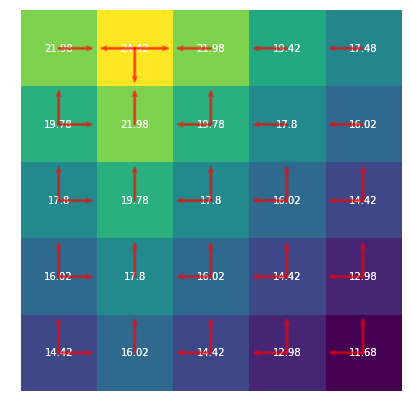

In [5]:
plotting.plot_gridworld_policy(get_optimal_policy())